In [1]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dummy import *

In [2]:
subs = generate_submissions(users=20, pbls=4)

In [3]:
bm = bianary_mat(subs)
bm

,U00000,U00001,U00002,U00003,U00004,U00005,U00006,U00007,U00008,U00009,U00010,U00011,U00012,U00013,U00014,U00015,U00016,U00017,U00018,U00019
P00000,1,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,0,1,0
P00001,1,0,1,1,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0
P00002,1,0,1,0,0,0,0,1,0,1,0,1,1,1,1,0,1,0,0,1
P00003,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0


In [4]:
def fct(row):
    '''
    u is the a binary verctor
    ''' 
    bads = subs[(subs.veredict != 'AC') & 
                       (subs.problem_id == row[0])].problem_id.count()
    tots = subs[subs.problem_id == row[0]].problem_id.count()
    return (float(bads) / tots)

In [5]:
Difficilties = evaluate_difficuly(bm, name='diff1')
Difficilties = Difficilties.join(evaluate_difficuly(bm, fct, name="diff2"))

In [6]:
Difficilties

,diff1,diff2
P00000,0.476017,0.499729
P00001,0.519291,0.483459
P00002,0.432742,0.512759
P00003,0.562565,0.503603


<IPython.core.display.Javascript object>


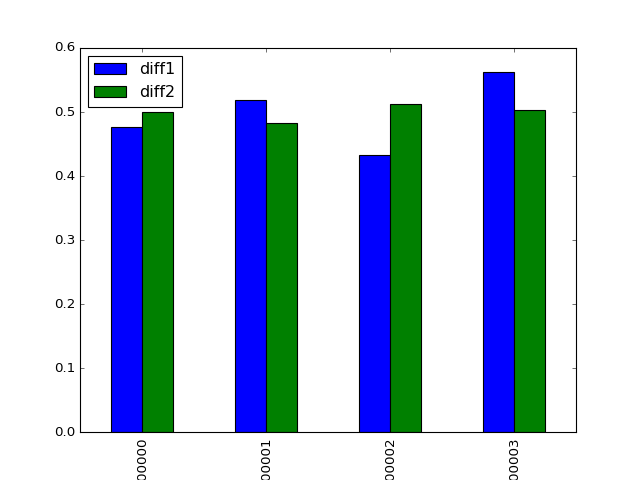

In [7]:
Difficilties.plot(kind='bar')

<IPython.core.display.Javascript object>


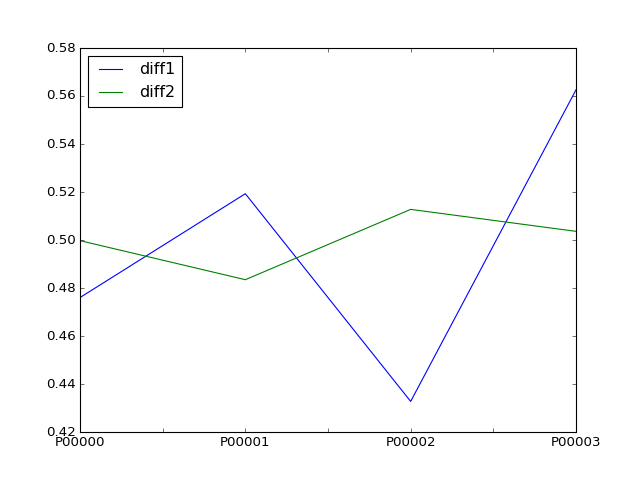

In [8]:
Difficilties.plot()

In [9]:
def Abilities(mat, pblslev):
    df = mat.join(pblslev)
    #print df
    return [df[df[i] > 0 ][pblslev.name].sum() for i in bm]

In [10]:
usrAb = Abilities(bm, Difficilties.diff1)
normalize(usrAb)
usrAb = pd.DataFrame(usrAb, index=bm.columns, columns=['abl1']).T

In [11]:
usrAb2 = Abilities(bm, Difficilties.diff2)
normalize(usrAb2)
usrAb2 = pd.DataFrame(usrAb2, index=bm.columns, columns=['abl2']).T
usrAb = usrAb.append(usrAb2)

<IPython.core.display.Javascript object>


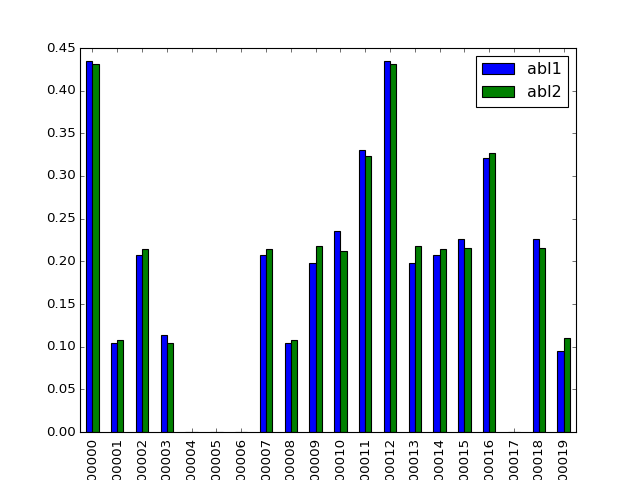

In [12]:
usrAb.T.plot(kind='bar')